In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df = pd.read_csv("Road_Weather_Information_Stations.csv")

In [78]:
df.head()

,StationName,StationLocation,DateTime,RecordId,RoadSurfaceTemperature,AirTemperature
0,RooseveltWay_NE80thSt,POINT (-122.31765 47.692098),03/04/2025 12:46:00 AM,6444193,47.22,47.22
1,RooseveltWay_NE80thSt,POINT (-122.31765 47.692098),03/04/2025 12:47:00 AM,6444194,47.22,47.22
2,RooseveltWay_NE80thSt,POINT (-122.31765 47.692098),03/04/2025 12:48:00 AM,6444195,47.22,47.22
3,RooseveltWay_NE80thSt,POINT (-122.31765 47.692098),03/04/2025 12:49:00 AM,6444196,47.22,47.22
4,RooseveltWay_NE80thSt,POINT (-122.31765 47.692098),03/04/2025 12:50:00 AM,6444197,47.22,47.22


In [79]:
df.tail()

,StationName,StationLocation,DateTime,RecordId,RoadSurfaceTemperature,AirTemperature
14060,AuroraBridge,POINT (-122.347278 47.643174),03/03/2025 12:56:00 AM,6394269,50.49,47.67
14061,AuroraBridge,POINT (-122.347278 47.643174),03/03/2025 12:57:00 AM,6394270,50.48,47.65
14062,AuroraBridge,POINT (-122.347278 47.643174),03/03/2025 12:58:00 AM,6394271,50.47,47.65
14063,AuroraBridge,POINT (-122.347278 47.643174),03/03/2025 12:59:00 AM,6394272,50.46,47.65
14064,AuroraBridge,POINT (-122.347278 47.643174),03/03/2025 01:00:00 AM,6394273,50.46,47.65


In [80]:
df.describe()

,RecordId,RoadSurfaceTemperature,AirTemperature
count,1.406500e+04,14065.000000,14065.00000
mean,4.817993e+06,48.778478,47.27448
std,1.727984e+06,2.636119,1.92964
min,1.697775e+06,43.280000,43.30000
25%,3.322578e+06,47.220000,45.74000
50%,4.700317e+06,48.820000,47.26000
75%,6.425212e+06,49.990000,48.49000
max,6.445467e+06,59.260000,54.54000


In [81]:
df.isnull().sum()

StationName               0
StationLocation           0
DateTime                  0
RecordId                  0
RoadSurfaceTemperature    0
AirTemperature            0
dtype: int64

In [82]:
df.shape

(14065, 6)

In [83]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

C:\Users\hp\AppData\Local\Temp\ipykernel_5892\2138640164.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateTime'] = pd.to_datetime(df['DateTime'])


In [84]:
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour

In [85]:
label_encoder = LabelEncoder()
df['StationName'] = label_encoder.fit_transform(df['StationName'])


In [86]:
feature_columns = ['StationName', 'AirTemperature', 'Year', 'Month', 'Day', 'Hour']
X = df[feature_columns]
y = df['RoadSurfaceTemperature']

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [89]:
y_pred = model.predict(X_test)

In [90]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = model.score(X_test, y_test)
print(f"Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²) Score: {r2:.4f}")
print(f"Model Accuracy (R² Score): {accuracy:.4f}")


Model Performance Metrics:
Mean Absolute Error (MAE): 1.13
R-squared (R²) Score: 0.6744
Model Accuracy (R² Score): 0.6744


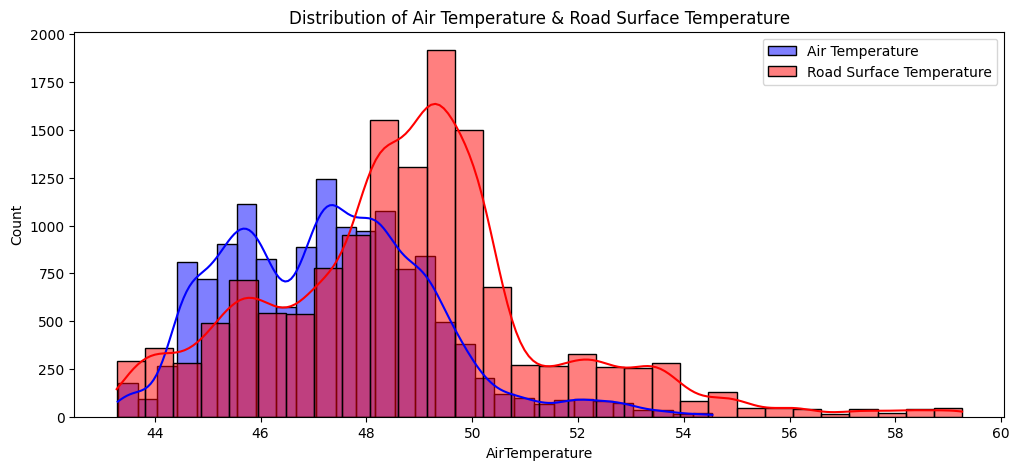

In [91]:
plt.figure(figsize=(12, 5))
sns.histplot(df['AirTemperature'], bins=30, kde=True, color="blue", label="Air Temperature")
sns.histplot(df['RoadSurfaceTemperature'], bins=30, kde=True, color="red", label="Road Surface Temperature")
plt.legend()
plt.title("Distribution of Air Temperature & Road Surface Temperature")
plt.show()

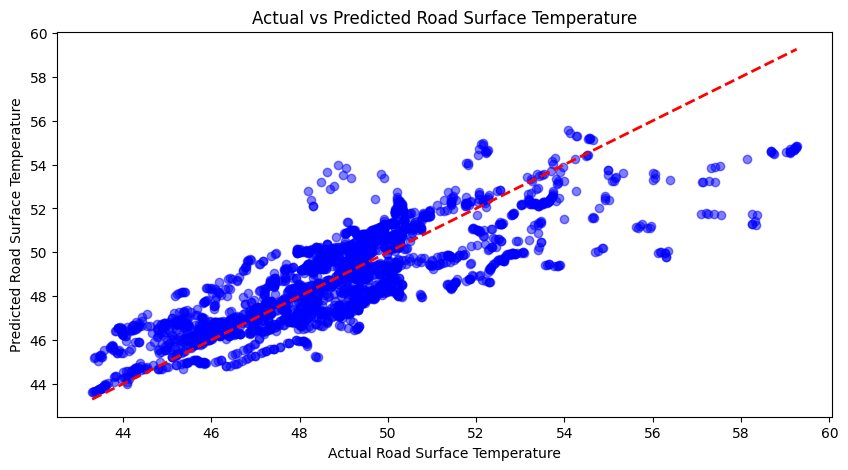

In [98]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color="blue", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", linewidth=2)
plt.xlabel("Actual Road Surface Temperature")
plt.ylabel("Predicted Road Surface Temperature")
plt.title("Actual vs Predicted Road Surface Temperature")
plt.show()

In [94]:
future_dates = [datetime.now() + timedelta(days=i) for i in range(1, 8)]
most_common_station = df['StationName'].mode()[0]  # Most frequently occurring station
avg_temp = df['AirTemperature'].mean()

In [95]:
future_df = pd.DataFrame({
    'StationName': [most_common_station] * 7,  # Using encoded most common station
    'AirTemperature': [avg_temp] * 7,  # Using average air temperature
    'Year': [date.year for date in future_dates],
    'Month': [date.month for date in future_dates],
    'Day': [date.day for date in future_dates],
    'Hour': [12] * 7  # Predicting at noon each day
})

In [96]:
future_df = future_df[feature_columns]

In [97]:
future_predictions = model.predict(future_df)
future_df['Predicted RoadSurfaceTemperature'] = future_predictions

print("\nNext Week's Predicted Road Surface Temperatures:")
print(future_df[['Year', 'Month', 'Day', 'Predicted RoadSurfaceTemperature']])


Next Week's Predicted Road Surface Temperatures:
   Year  Month  Day  Predicted RoadSurfaceTemperature
0  2025      3    6                         45.306020
1  2025      3    7                         44.293826
2  2025      3    8                         43.281632
3  2025      3    9                         42.269438
4  2025      3   10                         41.257244
5  2025      3   11                         40.245050
6  2025      3   12                         39.232857


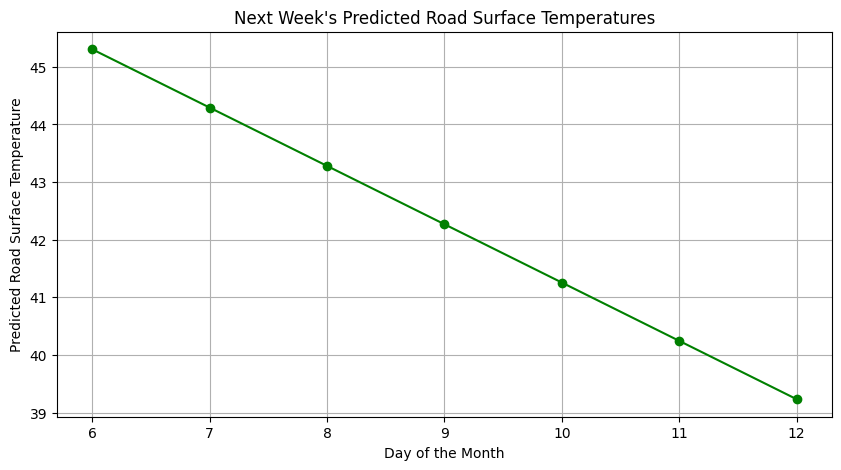

In [99]:
plt.figure(figsize=(10, 5))
plt.plot(future_df['Day'], future_df['Predicted RoadSurfaceTemperature'], marker='o', linestyle='-', color="green")
plt.xlabel("Day of the Month")
plt.ylabel("Predicted Road Surface Temperature")
plt.title("Next Week's Predicted Road Surface Temperatures")
plt.xticks(future_df['Day'])
plt.grid(True)
plt.show()